In [1]:
print("""
@Description: Classifying newswires: A multiclass classification example
@Author(s): Stephen CUI
@LastEditor(s): Stephen CUI
@CreatedTime: 2023-07-30 13:00:04
""")


@Description: Classifying newswires: A multiclass classification example
@Author(s): Stephen CUI
@LastEditor(s): Stephen CUI
@CreatedTime: 2023-07-30 13:00:04



In [2]:
from tensorflow.keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
    num_words=10_000,
)

In [3]:
len(train_data), len(test_data)

(8982, 2246)

In [4]:
print(train_data[0][:100])

[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]


In [5]:
word_index = reuters.get_word_index()
# 交换字典的 key 和 value 
reverse_word_index = dict([(value, key) for key, value in word_index.items()])
decoded_newswire = ' '.join(
    [reverse_word_index.get(i - 3, '?') for i in train_data[0]]
)

In [6]:
train_labels[10]

3

In [7]:
from func import vectorize_sequence
x_train = vectorize_sequence(train_data)
x_test = vectorize_sequence(test_data)

In [8]:
from func import to_one_hot
y_train = to_one_hot(train_labels, dimension=46)
y_test  = to_one_hot(test_labels, dimension=46)

In [9]:
# Note that there is a built-in way to do this in Keras:
# from tensorflow.keras.utils import to_categorical
# y_train = to_categorical(train_labels)
# y_test = to_categorical(test_labels)

In [10]:
from tensorflow import keras
from tensorflow.keras import layers
model = keras.Sequential([
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(46, activation='softmax'),
])

In [11]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'],)

In [12]:
x_val = x_train[:1_000]
partial_x_train = x_train[1_000:]
y_val = y_train[:1_000]
partial_y_train = y_train[1_000:]

In [13]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 2s 52ms/step - loss: 2.7891 - accuracy: 0.4837 - val_loss: 1.8981 - val_accuracy: 0.6280
Epoch 2/20
16/16 [==============================] - 0s 24ms/step - loss: 1.5786 - accuracy: 0.6775 - val_loss: 1.3898 - val_accuracy: 0.6880
Epoch 3/20
16/16 [==============================] - 0s 22ms/step - loss: 1.2046 - accuracy: 0.7420 - val_loss: 1.2252 - val_accuracy: 0.7250
Epoch 4/20
16/16 [==============================] - 0s 23ms/step - loss: 0.9867 - accuracy: 0.7902 - val_loss: 1.1056 - val_accuracy: 0.7550
Epoch 5/20
16/16 [==============================] - 0s 25ms/step - loss: 0.8185 - accuracy: 0.8245 - val_loss: 1.0353 - val_accuracy: 0.7790
Epoch 6/20
16/16 [==============================] - 0s 22ms/step - loss: 0.6849 - accuracy: 0.8534 - val_loss: 0.9603 - val_accuracy: 0.8000
Epoch 7/20
16/16 [==============================] - 0s 20ms/step - loss: 0.5794 - accuracy: 0.8727 - val_loss: 0.9298 - val_accuracy: 0.8000
Epoch 8/20
16

In [14]:
import matplotlib.pyplot as plt

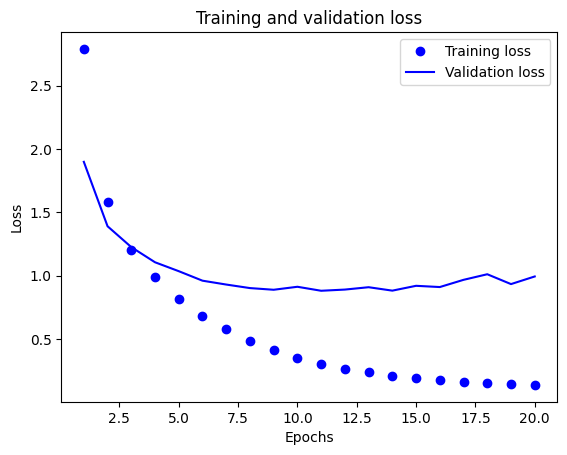

In [17]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

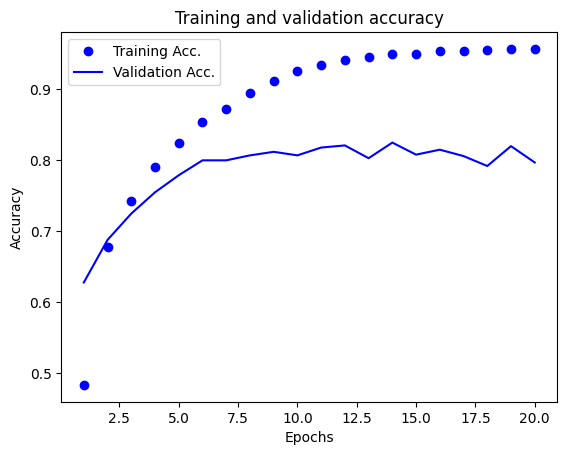

In [19]:
plt.clf()
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, acc, 'bo', label='Training Acc.')
plt.plot(epochs, val_acc, 'b', label='Validation Acc.')
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [21]:
model = keras.Sequential([
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(46, activation='softmax'),
])
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'],)
model.fit(x_train,
          y_train, epochs=9, batch_size=512)
results = model.evaluate(x_test, y_test)
results

Epoch 1/9
18/18 [==============================] - 2s 23ms/step - loss: 2.5770 - accuracy: 0.5235
Epoch 2/9
18/18 [==============================] - 0s 25ms/step - loss: 1.4535 - accuracy: 0.6857
Epoch 3/9
18/18 [==============================] - 0s 23ms/step - loss: 1.1316 - accuracy: 0.7557
Epoch 4/9
18/18 [==============================] - 0s 21ms/step - loss: 0.9215 - accuracy: 0.8047
Epoch 5/9
18/18 [==============================] - 0s 20ms/step - loss: 0.7641 - accuracy: 0.8369
Epoch 6/9
18/18 [==============================] - 0s 19ms/step - loss: 0.6275 - accuracy: 0.8667
Epoch 7/9
18/18 [==============================] - 0s 20ms/step - loss: 0.5304 - accuracy: 0.8870
Epoch 8/9
18/18 [==============================] - 0s 21ms/step - loss: 0.4378 - accuracy: 0.9074
Epoch 9/9
71/71 [==============================] - 0s 2ms/step - loss: 0.9199 - accuracy: 0.7890


[0.9199326634407043, 0.7889581322669983]

测试随机模型的准确率

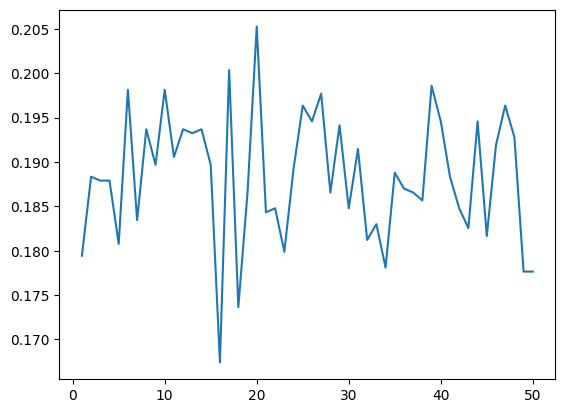

In [32]:
import copy
import numpy as np
test_labels_copy = copy.copy(test_labels)
acc_hist = []
times = 50
for i in range(times):
    np.random.shuffle(test_labels_copy)
    hists_array = np.array(test_labels_copy == test_labels)
    acc_hist.append(hists_array.mean())
plt.plot(range(1, times + 1), acc_hist)
plt.show()

In [38]:
predictions = model.predict(x_test)
predictions[0].shape

71/71 [==============================] - 0s 3ms/step


(46,)

In [39]:
np.sum(predictions[0])

0.9999999

In [40]:
np.argmax(predictions[0])

3

### 4.2.6处理标签和损失的另一种方法

In [44]:
y_train = np.array(train_labels)
y_test = np.array(test_labels)
# 另一种编码标签的方法，就是将其转换为整数张量
# 对于这种编码，唯一需要的就是改变损失函数的选择

In [45]:
model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'],)


### 4.2.7拥有足够大的中间层的重要性

In [47]:
model = keras.Sequential([
    layers.Dense(64, activation='relu'),
    layers.Dense(4, activation='relu'),
    layers.Dense(46, activation='softmax'),
])
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'],)
model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=128,
          validation_data=(x_val, y_val),)

Epoch 1/20
63/63 [==============================] - 2s 18ms/step - loss: 3.0355 - accuracy: 0.3567 - val_loss: 2.4357 - val_accuracy: 0.3900
Epoch 2/20
63/63 [==============================] - 1s 12ms/step - loss: 2.0596 - accuracy: 0.4372 - val_loss: 1.8733 - val_accuracy: 0.4380
Epoch 3/20
63/63 [==============================] - 1s 13ms/step - loss: 1.4834 - accuracy: 0.6476 - val_loss: 1.4772 - val_accuracy: 0.6320
Epoch 4/20
63/63 [==============================] - 1s 12ms/step - loss: 1.2200 - accuracy: 0.6913 - val_loss: 1.4430 - val_accuracy: 0.6670
Epoch 5/20
63/63 [==============================] - 1s 12ms/step - loss: 1.0872 - accuracy: 0.7379 - val_loss: 1.3764 - val_accuracy: 0.6820
Epoch 6/20
63/63 [==============================] - 1s 11ms/step - loss: 0.9851 - accuracy: 0.7622 - val_loss: 1.3506 - val_accuracy: 0.7000
Epoch 7/20
63/63 [==============================] - 1s 12ms/step - loss: 0.8995 - accuracy: 0.7776 - val_loss: 1.3442 - val_accuracy: 0.6930
Epoch 8/20
63